### Detection

In [ ]:
import os
import xml.etree.ElementTree as ET

# XML 파일을 YOLO 포맷으로 변환하는 함수
def convert_xml_to_yolo(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    width = int(root.find('size/width').text)
    height = int(root.find('size/height').text)
    result = []
    
    # 객체 정보 추출 및 변환
    for obj in root.findall('object'):
        class_id = 0  # 클래스 ID: 골프공
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        # YOLO 포맷 값 계산
        x_center = (xmin + xmax) / 2 / width
        y_center = (ymin + ymax) / 2 / height
        bbox_width = (xmax - xmin) / width
        bbox_height = (ymax - ymin) / height

        # YOLO 포맷의 문자열 생성
        result.append(f'{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}')
    
    return result

# YOLO 형식 데이터를 txt 파일로 저장하는 함수
def save_yolo_annotations(yolo_annotations, output_file):
    with open(output_file, 'w') as f:
        for annotation in yolo_annotations:
            f.write(annotation + '\n')

# 폴더 내 모든 XML 파일을 YOLO 형식으로 변환하여 저장하는 함수
def convert_all_xml_in_folder(input_folder, output_folder):
    # 입력 폴더 내 모든 파일을 확인
    for filename in os.listdir(input_folder):
        if filename.endswith('.xml'):
            xml_file_path = os.path.join(input_folder, filename)
            yolo_annotations = convert_xml_to_yolo(xml_file_path)

            # 출력할 txt 파일 경로 설정 (XML 파일과 동일한 이름으로 .txt 확장자 사용)
            output_txt_path = os.path.join(output_folder, filename.replace('.xml', '.txt'))
            
            # YOLO 형식으로 변환된 데이터를 txt 파일로 저장
            save_yolo_annotations(yolo_annotations, output_txt_path)

# 입력 폴더와 출력 폴더 경로 설정
input_folder = './GolfBall_data_for_tracking/Detection/Annotations'  # XML 파일들이 있는 폴더 경로
output_folder = './GolfBall_data_for_tracking/Detection/Annotations_YOLO'  # 변환된 txt 파일이 저장될 폴더 경로

# 출력 폴더가 존재하지 않으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 입력 폴더 내 모든 XML 파일을 YOLO 형식으로 변환하여 출력 폴더에 저장
convert_all_xml_in_folder(input_folder, output_folder)

print("모든 XML 파일이 YOLO 형식으로 변환되었습니다.")


모든 XML 파일이 YOLO 형식으로 변환되었습니다.


### Tracking

In [5]:
import os
import xml.etree.ElementTree as ET

# XML 파일을 YOLO 포맷으로 변환하는 함수
def convert_xml_to_yolo(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    width = int(root.find('size/width').text)
    height = int(root.find('size/height').text)
    result = []
    
    # 객체 정보 추출 및 변환
    for obj in root.findall('object'):
        class_id = 0  # 클래스 ID: 골프공
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        # YOLO 포맷 값 계산
        x_center = (xmin + xmax) / 2 / width
        y_center = (ymin + ymax) / 2 / height
        bbox_width = (xmax - xmin) / width
        bbox_height = (ymax - ymin) / height

        # YOLO 포맷의 문자열 생성
        result.append(f'{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}')
    
    return result

# YOLO 형식 데이터를 txt 파일로 저장하는 함수
def save_yolo_annotations(yolo_annotations, output_file):
    with open(output_file, 'w') as f:
        for annotation in yolo_annotations:
            f.write(annotation + '\n')

# 폴더 내 모든 XML 파일을 YOLO 형식으로 변환하여 저장하는 함수
def convert_all_xml_in_folder(input_folder, output_folder):
    # 입력 폴더 내 모든 파일을 확인
    for filename in os.listdir(input_folder):
        if filename.endswith('.xml'):
            xml_file_path = os.path.join(input_folder, filename)
            yolo_annotations = convert_xml_to_yolo(xml_file_path)

            # 출력할 txt 파일 경로 설정 (XML 파일과 동일한 이름으로 .txt 확장자 사용)
            output_txt_path = os.path.join(output_folder, filename.replace('.xml', '.txt'))
            
            # YOLO 형식으로 변환된 데이터를 txt 파일로 저장
            save_yolo_annotations(yolo_annotations, output_txt_path)

# 입력 폴더와 출력 폴더 경로 설정
input_folder = './GolfBall_data_for_tracking/Tracking/Annotations'  # XML 파일들이 있는 폴더 경로
output_folder = './GolfBall_data_for_tracking/Tracking/Annotations_YOLO'  # 변환된 txt 파일이 저장될 폴더 경로

# 출력 폴더가 존재하지 않으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 입력 폴더 내 모든 XML 파일을 YOLO 형식으로 변환하여 출력 폴더에 저장
convert_all_xml_in_folder(input_folder, output_folder)

print("모든 XML 파일이 YOLO 형식으로 변환되었습니다.")


모든 XML 파일이 YOLO 형식으로 변환되었습니다.


Processing Image0207_1367_00003.jpg and Image0207_1367_00003.txt


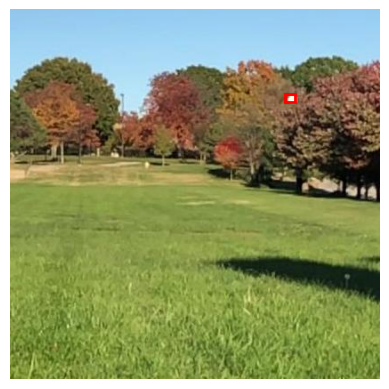

Processing Image0210_793_00001.jpg and Image0210_793_00001.txt


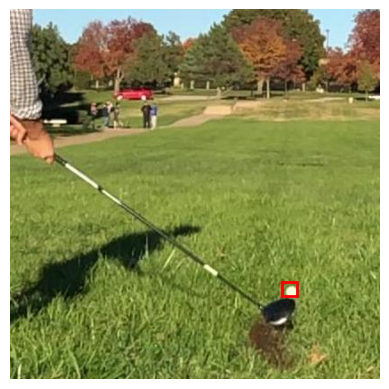

Processing Golf17_096_00004.jpg and Golf17_096_00004.txt


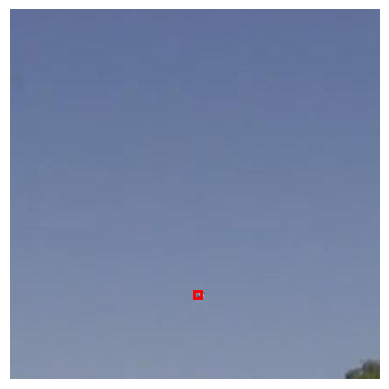

Processing Image0213_20309_00006.jpg and Image0213_20309_00006.txt


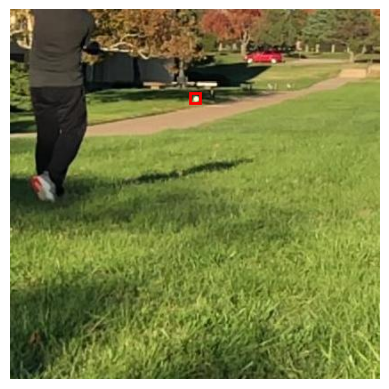

Processing Image0210_10666_00009.jpg and Image0210_10666_00009.txt


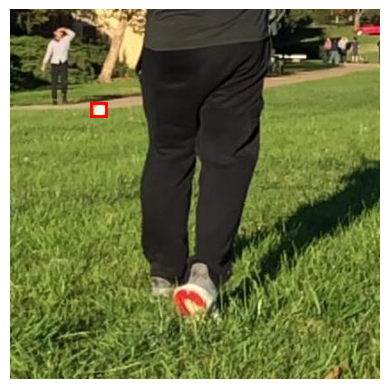

In [14]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# YOLO 형식의 txt 파일을 읽어 바운딩 박스 정보를 추출하는 함수
def parse_yolo_txt(txt_file, img_width, img_height):
    boxes = []
    with open(txt_file, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])

            # YOLO 형식의 값을 실제 이미지 크기로 변환
            xmin = int((x_center - width / 2) * img_width)
            ymin = int((y_center - height / 2) * img_height)
            box_width = int(width * img_width)
            box_height = int(height * img_height)

            # 바운딩 박스 정보 저장 (xmin, ymin, width, height)
            boxes.append((xmin, ymin, box_width, box_height))
    return boxes

# 바운딩 박스를 이미지 위에 그리는 함수
def draw_bounding_boxes(image_path, bounding_boxes):
    # 이미지 읽어오기
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 이미지를 읽으므로 RGB로 변환
    img_height, img_width, _ = image.shape

    fig, ax = plt.subplots(1)
    ax.imshow(image_rgb)

    # 바운딩 박스 그리기
    for box in bounding_boxes:
        xmin, ymin, box_width, box_height = box
        # 빨간색 테두리로 바운딩 박스 그리기
        rect = patches.Rectangle((xmin, ymin), box_width, box_height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')  # 축 숨기기
    plt.show()

# 이미지 폴더와 라벨 폴더에서 랜덤으로 5개의 파일을 선택하여 바운딩 박스를 그리는 함수
def process_random_images_and_labels(image_folder, label_folder, num_samples=5):
    # 이미지 폴더 내의 모든 파일 확인 (확장자가 .jpg인 파일만 처리)
    image_files = [file for file in os.listdir(image_folder) if file.endswith('.jpg')]
    
    # 이미지 파일이 충분한지 확인하고 랜덤으로 num_samples개의 파일 선택
    if len(image_files) < num_samples:
        print(f"폴더에 {num_samples}개 이상의 이미지가 없습니다.")
        return
    
    selected_images = random.sample(image_files, num_samples)

    for image_filename in selected_images:
        # 이미지 파일 이름에서 확장자를 제거하고 .txt 확장자를 붙여서 라벨 파일 경로 생성
        base_filename = os.path.splitext(image_filename)[0]
        label_filename = base_filename + '.txt'
        
        image_path = os.path.join(image_folder, image_filename)
        label_path = os.path.join(label_folder, label_filename)

        # 라벨 파일이 존재하는지 확인
        if os.path.exists(label_path):
            print(f"Processing {image_filename} and {label_filename}")
            
            # 이미지 크기 가져오기
            image = cv2.imread(image_path)
            img_height, img_width, _ = image.shape
            
            # YOLO 라벨 파일을 파싱하여 바운딩 박스 정보 추출
            bounding_boxes = parse_yolo_txt(label_path, img_width, img_height)
            
            # 바운딩 박스를 그리는 함수 호출
            draw_bounding_boxes(image_path, bounding_boxes)
        else:
            print(f"Label file for {image_filename} not found.")

# 이미지와 라벨 파일 경로 설정
image_folder = './GolfBall_data_for_tracking/train/images_preprocessed'  # 이미지 파일들이 있는 폴더 경로
label_folder = './GolfBall_data_for_tracking/train/labels'  # 라벨 파일들이 있는 폴더 경로

# 랜덤으로 5개의 이미지와 라벨 파일을 처리하여 바운딩 박스를 그리기
process_random_images_and_labels(image_folder, label_folder, num_samples=5)


In [8]:
import os
import glob
import shutil
import random

# Define the paths
image_dir = './GolfBall_data_for_tracking/Detection/JPEGImages'
label_dir = './GolfBall_data_for_tracking/Detection/Annotations_YOLO'

# Output directories for train and test splits
train_image_dir = './GolfBall_data_for_tracking/train/JPEGImages'
train_label_dir = './GolfBall_data_for_tracking/train/Annotations_YOLO'
test_image_dir = './GolfBall_data_for_tracking/test/JPEGImages'
test_label_dir = './GolfBall_data_for_tracking/test/Annotations_YOLO'

# Create output directories if they don't exist
os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(test_image_dir, exist_ok=True)
os.makedirs(test_label_dir, exist_ok=True)

# Get lists of image and label files
image_files = glob.glob(os.path.join(image_dir, '*.jpg'))
label_files = glob.glob(os.path.join(label_dir, '*.txt'))

# Ensure that each image has a corresponding label
paired_files = [(img_file, img_file.replace('.jpg', '.txt').replace(image_dir, label_dir)) 
                for img_file in image_files 
                if os.path.exists(img_file.replace('.jpg', '.txt').replace(image_dir, label_dir))]

# Shuffle the list of paired files
random.shuffle(paired_files)

# Split into 80% train and 20% test
split_idx = int(0.8 * len(paired_files))
train_files = paired_files[:split_idx]
test_files = paired_files[split_idx:]

# Function to move files to the respective directories
def move_files(file_pairs, img_dest, lbl_dest):
    for img_file, lbl_file in file_pairs:
        shutil.move(img_file, os.path.join(img_dest, os.path.basename(img_file)))
        shutil.move(lbl_file, os.path.join(lbl_dest, os.path.basename(lbl_file)))

# Move training files
move_files(train_files, train_image_dir, train_label_dir)

# Move testing files
move_files(test_files, test_image_dir, test_label_dir)

print(f'Total images: {len(paired_files)}')
print(f'Training images: {len(train_files)}')
print(f'Testing images: {len(test_files)}')

Total images: 17436
Training images: 13948
Testing images: 3488
